# SMS Chat Analysis
***

## Import and look over your dataset

To begin, I imported the libraries and data I will use for the portfolio project. Here I used `pandas` to create a DataFrame with the data with the `pd.read_csv()` method.

In [3]:
# Import pandas with alias
import pandas as pd

In [4]:
# Import the SMS data as a pandas DataFrame
df = pd.read_csv('clean_nus_sms.csv', index_col=0)

Now that I have the DataFrame created, I can view a sample of the DataFrame with the `.head()` method.

In [5]:
# Check data
df.head()

,id,Message,length,country,Date
0,10120,Bugis oso near wat...,21,SG,2003/4
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,10124,Meet after lunch la...,22,SG,2003/4


I can take a quick look at shape of the DataFrame and the type of each variable with the `.info()` method.

In [6]:
# View DataFrame shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 55834
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       48598 non-null  int64 
 1   Message  48595 non-null  object
 2   length   48598 non-null  object
 3   country  48598 non-null  object
 4   Date     48598 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


Some notes
* The `Message` variable has 3 fewer values than the other variables, which will need to be addressed.
* All of the values in the DataFrame are strings, except for the `id` variable.
* There are 48,598 messages present in the DataFrame.

## Plan your analysis

Great, now that I have an idea of what the data looks like, I can consider the possible applications it could be useful for. 

One of the fundamental values in text messages is what it can tell me about how people communicate. Based on the data, I'm interested in performing sentiment analysis on the `Message` variable, and statistical analysis on how sentiment varies between countries.

With this in mind, this solution pathway will focus on conducting sentiment analysis on messages within the NUS SMS Corpus. Here the goal is to create a model that can classify text to explore the sentiment present and compare the general sentiment of messages between countries in the NUS SMS Corpus.


## Choose an NLP model or technique

To accomplish this, I plan to include the following NLP tasks:

* Text preprocessing using regex and NLTK.
* Exploratory data analysis with pandas and seaborn.
* Sentiment analysis using bag-of-words and a Naive Bayes classifier.

## Conduct text preprocessing

In this solution, I want to remove unnecessary characters and words and standardize the casing, so the following text preprocessing tasks are helpful: 

* Noise Removal
    * Empty messages
    * Punctuation
    * Stopwords
    * URLs
    * HTML Tags

* Text Normalization 
    * Lower Casing

### Remove empty messages

First, I want to remove any rows without a message. I'll do this with the pandas `.dropna()` method.

In [8]:
df = df.dropna()
len(df)

48595

It looks like I removed 3 blank messages!

### Lower case message data

My next step in preprocessing is to set all of the characters to lower case by chaining the `.str()` method to convert the pandas Series so that the `.lower()` method can be applied to lower case each string in the column.

In [9]:
# Set all characters to lower case in Message
df["Message_clean"] = df["Message"].str.lower()
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### Remove punctuation

Now that all of the characters are in lower case, I will use the same approach for removing punctuation. I will chain the `.str()` method with the `.replace()` method to remove any punctuation.

In [10]:
# Remove punctiation from Message variable
df["Message_clean"] = df["Message_clean"].str.replace('[^\w\s]','')
# View changes
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove stopwords

Removing stopwords is an effective approach when conducting most NLP techniques. However, for sentiment analysis, valuable information could be lost when stopwords are removed. I'll take a look at the English stopwords in NLTK to determine if it would be best to remove them.

In [11]:
# Import NLTK library
import nltk

In [13]:
# Import stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# View stopwords in english
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

Considering that removing these stopwords from the `Message` variable could potentially alter the meaning of some of the messages, or alter sentiment within them, I will leave these words in.

### Remove URLs

For some datasets, URL removal is a useful component of the text preprocessing phase, so I'll remove them here using regular expressions.

In [14]:
# Import re library for regular expressions
import re

In [15]:
# Create a function to remove url from Message data
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [16]:
# Remove URLs from Message data

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_urls(text))
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Remove HTMLs

Similarly, I will remove the HTML tags using the re library's `.compile()` method.

In [17]:
# Create a function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [18]:
# Remove HTML from Message data
df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
# View changes
df.head()

,id,Message,length,country,Date,Message_clean
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la


### Tokenize cleaned messages

I will need tokenized messages to do my sentiment analysis later. I will use the `word_tokenize` module from `nltk`.

In [19]:
# Import word_tokenize from nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# Tokenize cleaned messages
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,Message,length,country,Date,Message_clean,Message_tokenized
0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"


In [20]:
# Save the preprocessed DataFrame
df.to_csv('processed_clean_nus_sms.csv', header = True)

## Conduct your analysis

Terrific! Now it is time to conduct my analysis.

### Exploratory Data Analysis

Now that I have my preprocessed dataset, I will perform exploratory data analysis. Here I will focus on creating visualizations to get a better understanding of the data and any patterns.

In [21]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline

I will start with the `country` category to get an idea of how many countries there are in the DataFrame. I will use the `.nunique()` method to find out the number of unique values in the `country` column.

In [22]:
# Count the number of unique countries
df['country'].nunique()

40

I can also view how many messages were sent from each country using the `.value_counts()` method. 

In [23]:
# View message count by country
df['country'].value_counts()

Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Australia     

I can see that I need to clean the values in `country`. For instance, `SG` represents the country code for Singapore. Likewise, `USA` represents the United States. I'll use the `.replace()` method to assign the correct values for each country.

In [24]:
# Correct values
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})
#count the real number of unique countries
df['country'].nunique()

33

In [25]:
# View message count by country
df['country'].value_counts()

Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Trinidad and Tobago       10
Lebanon                   10
Turkey                    10
Nigeria                   10
New Zealand               10
Slovenia                  10
Macedonia                 10
Morocco                    9
Australia                  9
Romania                    9
Jamaica                    8
Barbados                   8
Spain                      5
France                     5
Name: country, dtype: int64

I'll visualize the top ten most frequently occurring countries with a barplot.

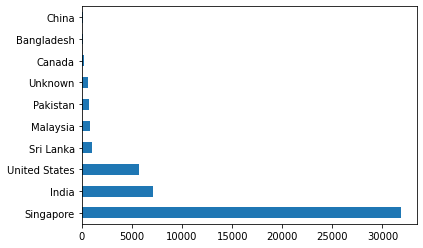

In [26]:
# Number of messages per country
country_value_counts = df['country'].value_counts() 

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# Plot a bar chart using pandas built-in plotting apis
top_10_country_value_counts.plot.barh() 

Here I can glean that users from Singapore, India, and the United States sent the majority of messages. 

### Sentiment Analysis

Now that I have conducted some light EDA, I will move on to sentiment analysis. There are several approaches one can take to analyzing sentiment of text data, and I will primarily use models from the NLTK library. Here a message will be categorized into one of two categories:

* Positve
* Negative

I will use Naive Bayes classification to determining the sentiment of the messages in the `Message` variable. This will involve using Twitter data with known sentiments to create a classifier. 


In [27]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

After downloading the Twitter data from the `nltk` library, I will import it from `nltk.corpus` as `twitter_samples`.

In [28]:
# import the twitter data
from nltk.corpus import twitter_samples

My first step is to instantiate the tweets that have been labeled as positive and negative, in order to create a training set that can be fed into the classifier.

In [29]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

I will take a quick peek into the types of tweets and their distributions with indexing and `len()`.

In [30]:
# View first positive tweet
print(positive_tweets[0])
# View number of positive tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.


In [31]:
# View first negative tweet
print(negative_tweets[0])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

hopeless for tmr :(
There are 5000 negative tweets.


I can see that the number of positive to negative samples used to assemble the training set is evenly distributed. I need to tokenize the tweets.

In [32]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[0])

# Create tokens from the positive tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


Since I removed HTML tags and URLs in the SMS data, I'll do the same for the tweets. I'll use the same functions for this as I defined above.

In [33]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

Now I need to select the features for my classifier. I will select the most common words in my corpus because I assume that these words are the best indicators if something is positive or negative. I will use a frequency distribution to select them.

In [34]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130058

In [35]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

22692
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

Now I need to create a feature extractor that identifies when a feature is present in a message.

In [36]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
test_sentence = "coding is fun with codecademy :)".split(" ")
print(document_features(test_sentence, sentiment_features))

{':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': False, 'is': True, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': True, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': 

Now I need to create training and testing sets, and label them accordingly. 70% of the tweets will be used for the training set, and 30% for the testing set. Using the `random` library, I can randomly select the tweets for each.

In [37]:
# Import random library
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

I will use the `NaiveBayesClassifier` model with my training and testing sets to build my sentiment model. I will use the `classify()` function to test the performance of my model on my training set. 


In [38]:
# Import classify and sentiment analysis model
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data (this will take awhile)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True           

Now I will use my model to classify the sentiment of my messages. I will try it out on just one before applying it to the whole corpus.

In [39]:
# Select one sample message to evaluate
sample_message = str(df["Message_tokenized"][49])
print(sample_message)

# Print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['yup', 'hey', 'then', 'one', 'day', 'on', 'fri', 'we', 'can', 'ask', 'miwa', 'and', 'jiayin', 'take', 'leave', 'go', 'karaoke']
Negative


The sentiment of the 50th message (`"yup hey then one day on fri we can ask miwa and jiayin take leave go karaoke"`) is Negative per my model. 

Now I will evaluate all the messages in the NUS SMS Corpus.

In [40]:
# Create an empty list
sentiments = []

# Iterate through the column and predict each response's sentiment, append 
# sentiment to new list
for message in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in message)))))

# add the list back to our DataFrame
df['Sentiment'] = sentiments

df['Sentiment'].value_counts()

Negative    31207
Positive    17388
Name: Sentiment, dtype: int64

I want to know what portion of the data is Positive/Negative. I will use the `.value_counts()` method and set `normalize = True` so I get a proportion instead of raw counts.

In [41]:
# View the proportion of the corpus in each class
df['Sentiment'].value_counts(normalize = True)

Negative    0.642185
Positive    0.357815
Name: Sentiment, dtype: float64

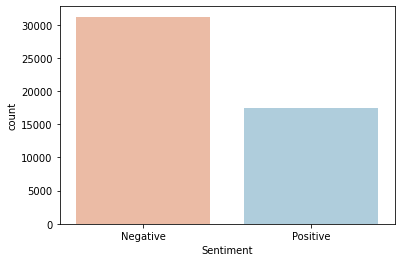

In [42]:
# View distribution in a countplot
sns.countplot(x='Sentiment', data=df, palette='RdBu')

My model predicts that 64.3% of the messages in the NUS SMS Corpus are Negative.

Now I want to compare sentiment by country. To make this easier, I will transform my sentiment into a numeric variable. I will assign Positive messages '1' and Negative messages '-1'. 


In [43]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
df['Sentiment_score'] = df['Sentiment'].apply(convert_sentiment)

#check 
df.head()

,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment,Sentiment_score
0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative,-1
1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative,-1
2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative,-1
3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative,-1
4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative,-1


Now I will group by country and use the `.mean()` method to get the average sentiment score for each country.

In [44]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = df.groupby(['country']).mean()

#reset the index
df_sent.reset_index(inplace=True)

df_sent.head()

,country,id,Sentiment_score
0,Australia,45574.666667,0.111111
1,Bangladesh,39876.301587,-0.190476
2,Barbados,45633.500000,-1.000000
3,Canada,5763.035354,-0.252525
4,China,12499.878505,-0.177570


I want to know which country sends the most positive messages, so I will use the `.sort_values()` method.

In [45]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score') 

,country,id,Sentiment_score
13,Lebanon,41975.500000,-1.000000
2,Barbados,45633.500000,-1.000000
19,Nigeria,41682.500000,-0.600000
25,Slovenia,41282.500000,-0.600000
29,Turkey,45643.500000,-0.600000
22,Romania,41232.000000,-0.555556
11,Jamaica,45285.250000,-0.500000
10,Italia,45593.500000,-0.400000
24,Singapore,23200.872835,-0.377503
21,Philippines,39688.328358,-0.283582


Now I will plot the sentiment by country to see which countries are the most Positive/Negative.

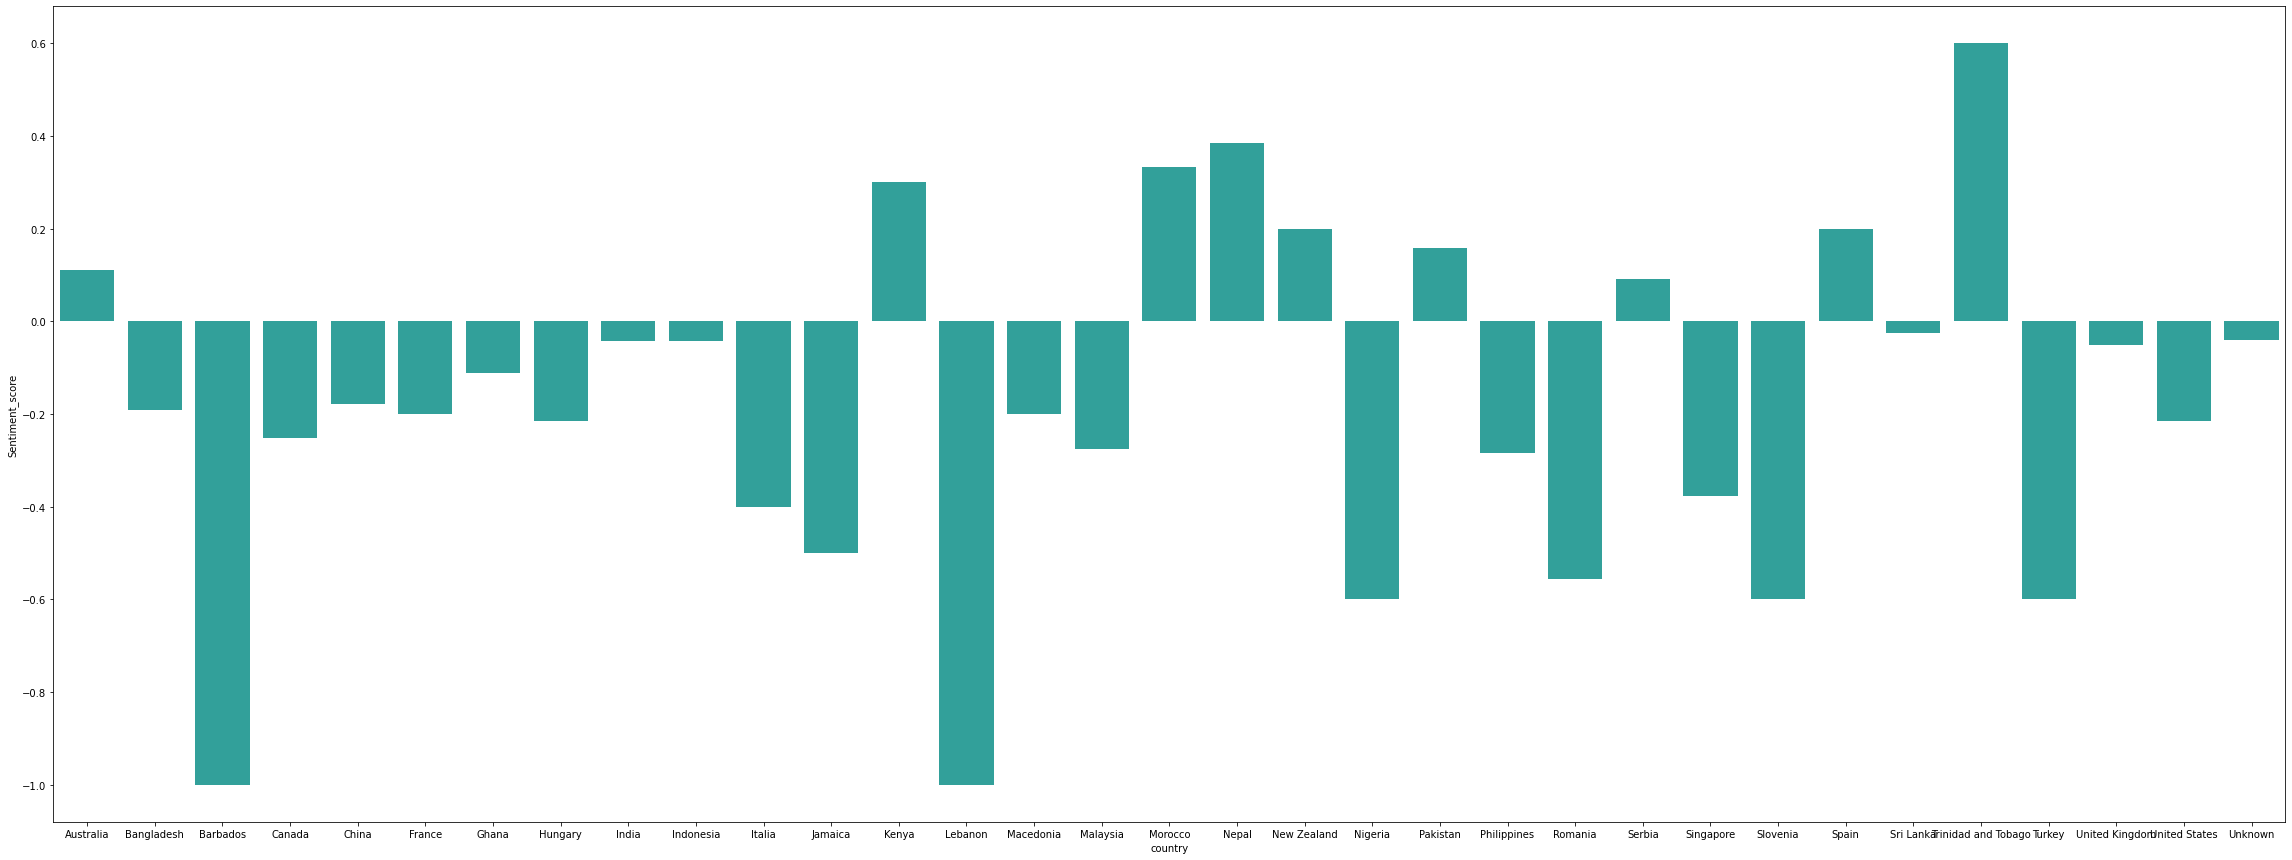

In [46]:
# Plot general sentiments
fig, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax,
                 color="lightseagreen")